# Data Science Practice Notebook

This notebook covers common data science tasks and workflows using Python.

## Topics Covered:
1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Data Visualization
5. Statistical Analysis
6. Machine Learning Basics


In [4]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4
Matplotlib version: 3.10.7


## 1. Data Loading and Exploration

Let's create a sample dataset for practice. In real scenarios, you'd load data from CSV, Excel, databases, or APIs.


In [5]:
# Create a sample dataset with some realistic patterns
np.random.seed(42)
n_samples = 1000

# Generate synthetic data
data = {
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 15000, n_samples),
    'education_years': np.random.randint(12, 20, n_samples),
    'experience_years': np.random.randint(0, 40, n_samples),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], n_samples),
    'satisfaction_score': np.random.uniform(1, 10, n_samples)
}

# Create relationship: income increases with experience and education
data['income'] = data['income'] + data['experience_years'] * 2000 + data['education_years'] * 1500

# Add some noise and missing values
data['income'] = data['income'] + np.random.normal(0, 5000, n_samples)
data['income'] = np.abs(data['income'])  # Ensure positive values

# Introduce missing values (5% of income data)
missing_indices = np.random.choice(n_samples, size=int(n_samples * 0.05), replace=False)
data['income'][missing_indices] = np.nan

# Create DataFrame
df = pd.DataFrame(data)

print("Sample dataset created!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()


Sample dataset created!
Shape: (1000, 6)

First few rows:


,age,income,education_years,experience_years,city,satisfaction_score
0,56,135176.212461,13,21,Los Angeles,4.601910
1,69,114880.497072,13,24,New York,8.049682
2,46,128601.336893,19,17,Phoenix,3.393356
3,32,90525.502241,15,16,Houston,9.912991
4,60,93807.319082,19,11,New York,1.231926


In [6]:
# Basic information about the dataset
print("Dataset Info:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")


Dataset Info:
Shape: (1000, 6)

Column names: ['age', 'income', 'education_years', 'experience_years', 'city', 'satisfaction_score']

Data types:
age                     int64
income                float64
education_years         int64
experience_years        int64
city                   object
satisfaction_score    float64
dtype: object

Missing values:
age                    0
income                50
education_years        0
experience_years       0
city                   0
satisfaction_score     0
dtype: int64

Basic statistics:
               age         income  education_years  experience_years  \
count  1000.000000     950.000000      1000.000000       1000.000000   
mean     49.857000  113351.172026        15.569000         19.664000   
std      18.114267   28743.862106         2.282202         11.479586   
min      18.000000   24614.001787        12.000000          0.000000   
25%      35.000000   93163.702409        14.000000         10.000000   
50%      50.000000  112301.56

## 2. Data Cleaning and Preprocessing


In [7]:
# Handle missing values
print("Before handling missing values:")
print(f"Missing values in income: {df['income'].isnull().sum()}")

# Option 1: Fill with median (good for numerical data)
df['income'].fillna(df['income'].median(), inplace=True)

# Option 2: Drop rows (if few missing values)
# df = df.dropna()

print("\nAfter handling missing values:")
print(f"Missing values in income: {df['income'].isnull().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Before handling missing values:
Missing values in income: 50

After handling missing values:
Missing values in income: 0

Duplicate rows: 0
Shape after removing duplicates: (1000, 6)


In [8]:
# Handle outliers (using IQR method)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in income
outliers = detect_outliers_iqr(df, 'income')
print(f"Number of outliers in income: {len(outliers)}")
print(f"Outlier percentage: {len(outliers)/len(df)*100:.2f}%")

# Option: Remove or cap outliers (capping is often better)
# For demonstration, we'll cap outliers
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['income'] = df['income'].clip(lower=lower_bound, upper=upper_bound)
print(f"\nIncome range after capping: ${df['income'].min():.2f} - ${df['income'].max():.2f}")


Number of outliers in income: 2
Outlier percentage: 0.20%

Income range after capping: $37646.64 - $186500.75


## 3. Exploratory Data Analysis (EDA)


Correlation Matrix:
                         age    income  education_years  experience_years  \
age                 1.000000  0.032442         0.008169          0.043878   
income              0.032442  1.000000         0.136846          0.780132   
education_years     0.008169  0.136846         1.000000          0.024346   
experience_years    0.043878  0.780132         0.024346          1.000000   
satisfaction_score  0.046989 -0.002275        -0.040275          0.014833   

                    satisfaction_score  
age                           0.046989  
income                       -0.002275  
education_years              -0.040275  
experience_years              0.014833  
satisfaction_score            1.000000  


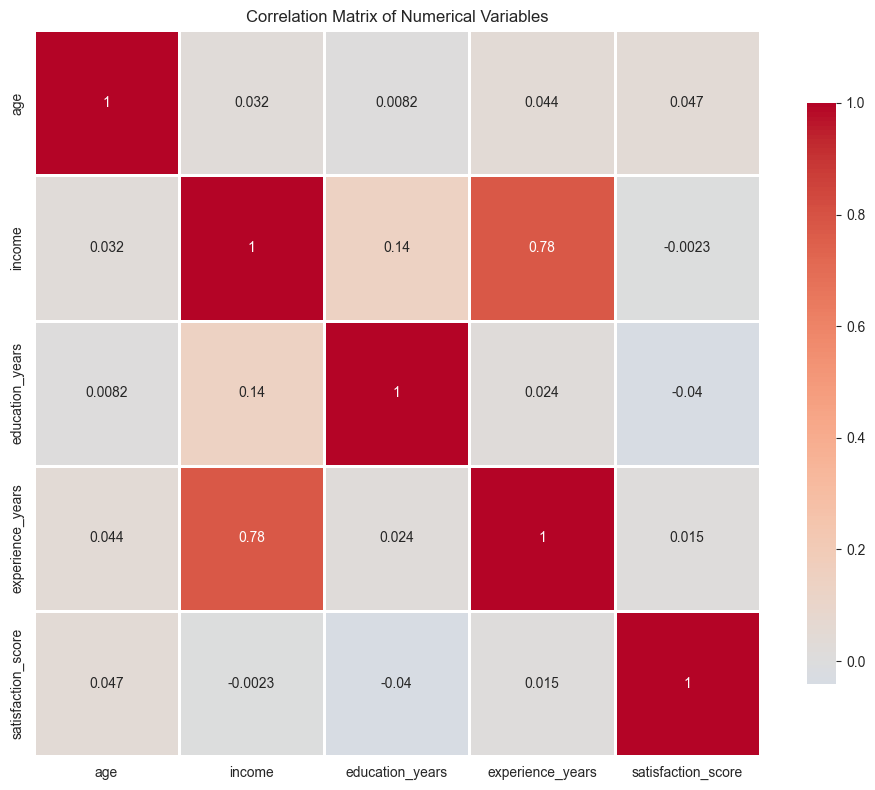

In [ ]:
# Correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


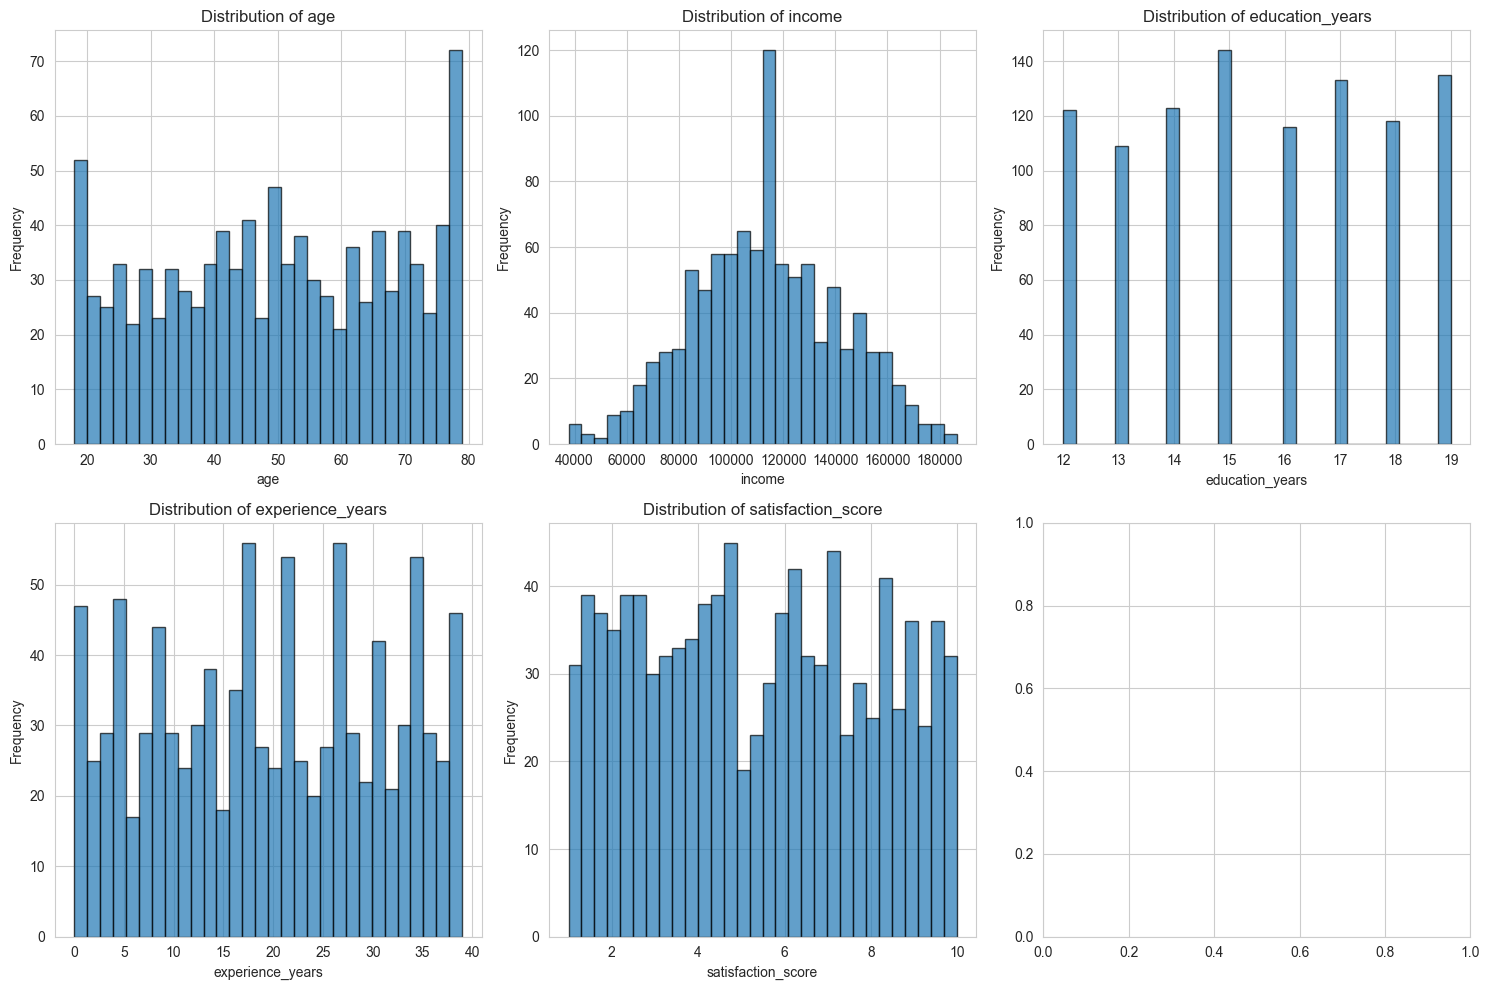

In [10]:
# Distribution of numerical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


City distribution:
city
Phoenix        212
Chicago        205
New York       198
Los Angeles    197
Houston        188
Name: count, dtype: int64

Percentage distribution:
city
Phoenix        21.2
Chicago        20.5
New York       19.8
Los Angeles    19.7
Houston        18.8
Name: proportion, dtype: float64


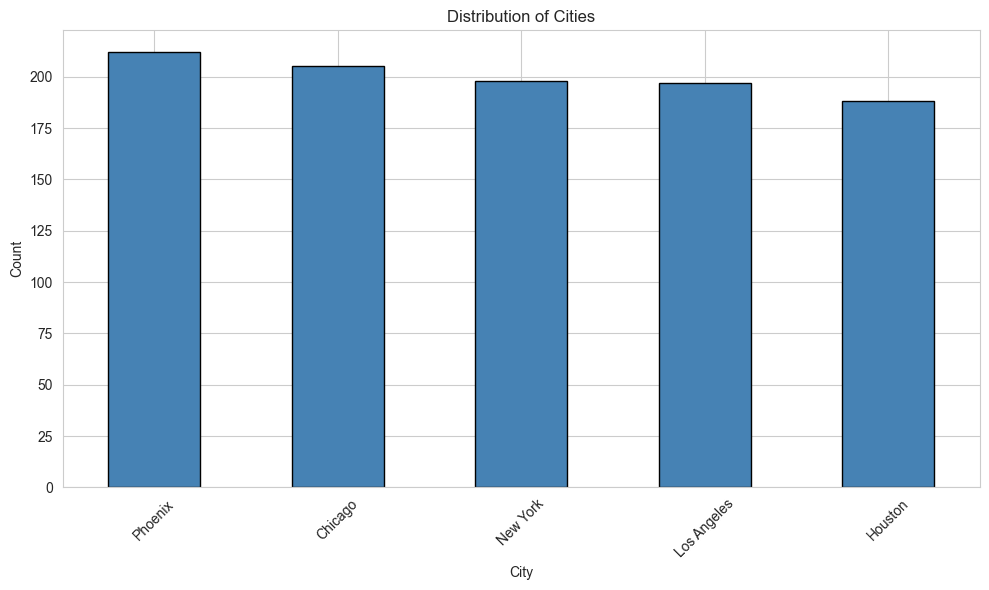

In [11]:
# Categorical variable analysis
print("City distribution:")
print(df['city'].value_counts())
print("\nPercentage distribution:")
print(df['city'].value_counts(normalize=True) * 100)

# Visualize categorical data
plt.figure(figsize=(10, 6))
df['city'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Data Visualization


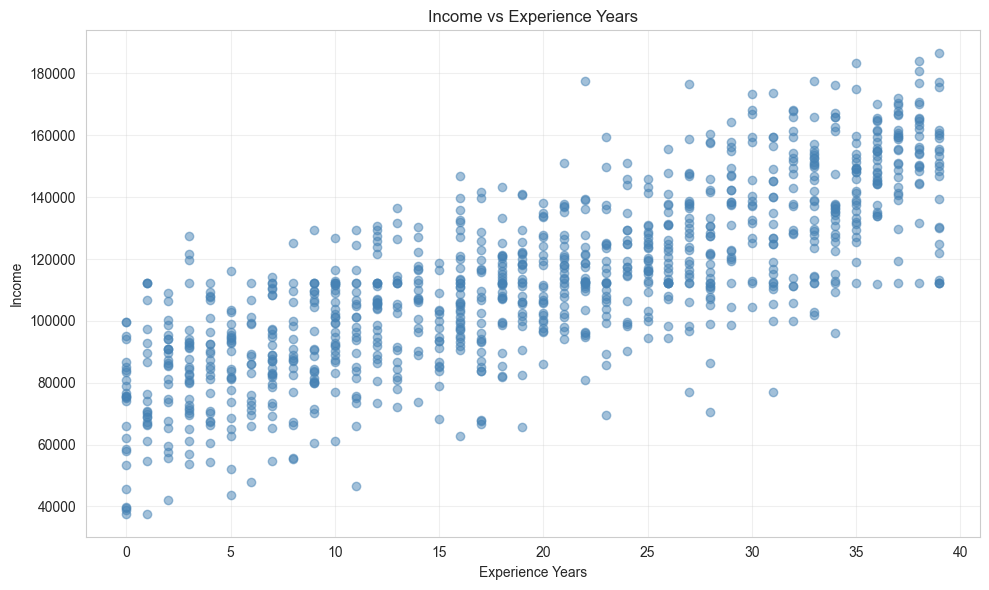

In [12]:
# Scatter plot: Income vs Experience
plt.figure(figsize=(10, 6))
plt.scatter(df['experience_years'], df['income'], alpha=0.5, color='steelblue')
plt.xlabel('Experience Years')
plt.ylabel('Income')
plt.title('Income vs Experience Years')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


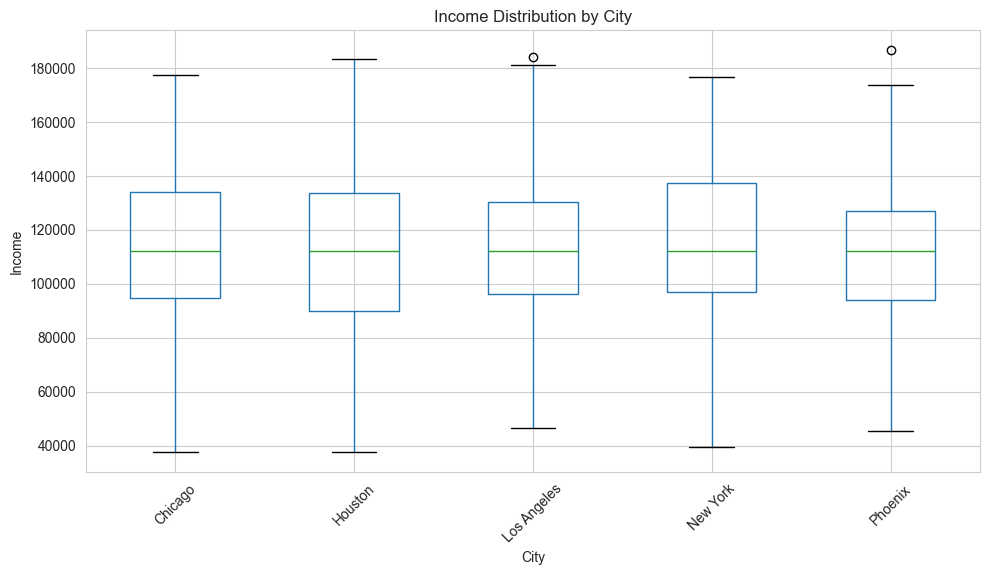

In [13]:
# Box plot: Income by City
plt.figure(figsize=(10, 6))
df.boxplot(column='income', by='city', ax=plt.gca())
plt.title('Income Distribution by City')
plt.suptitle('')  # Remove default title
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


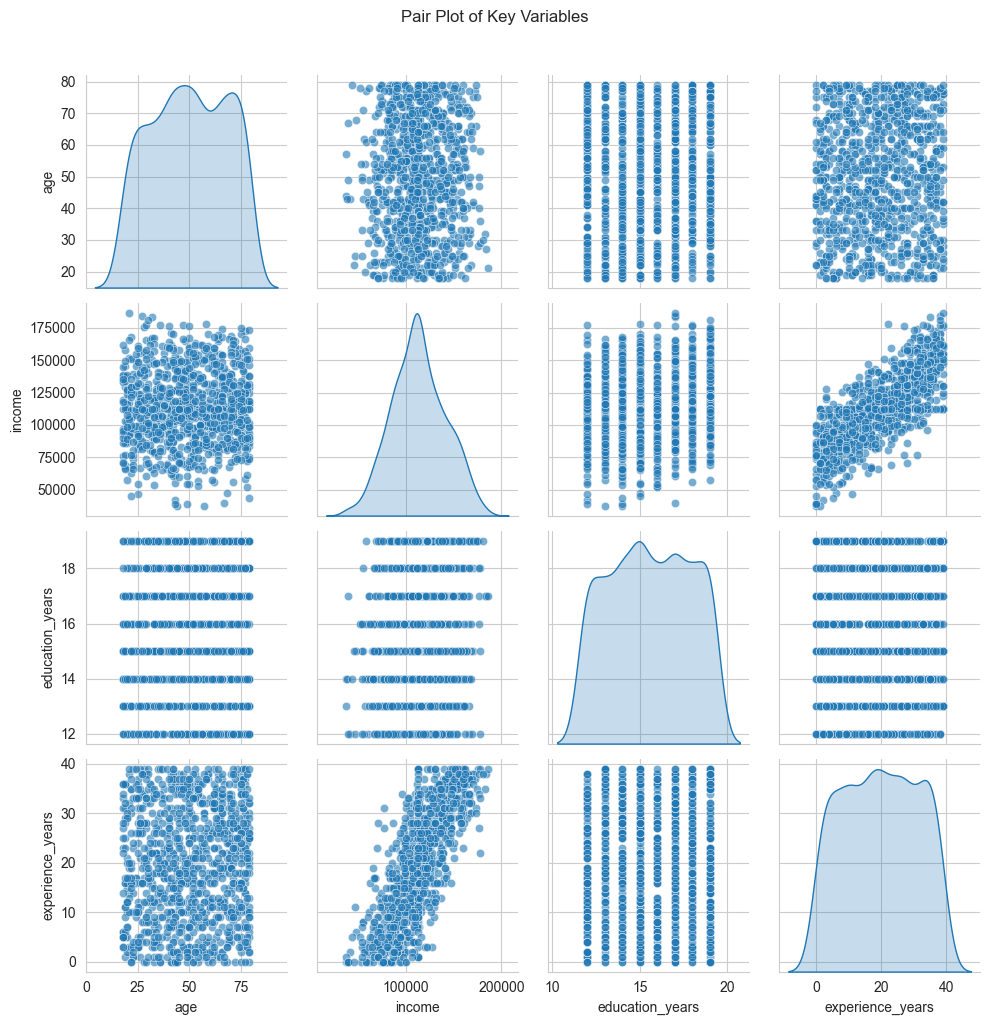

In [14]:
# Pair plot for key numerical variables
key_vars = ['age', 'income', 'education_years', 'experience_years']
sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.tight_layout()
plt.show()


## 5. Statistical Analysis


In [15]:
# Statistical summary
print("Statistical Summary for Income:")
print("=" * 50)
print(f"Mean: ${df['income'].mean():.2f}")
print(f"Median: ${df['income'].median():.2f}")
print(f"Standard Deviation: ${df['income'].std():.2f}")
print(f"Minimum: ${df['income'].min():.2f}")
print(f"Maximum: ${df['income'].max():.2f}")
print(f"Skewness: {df['income'].skew():.2f}")
print(f"Kurtosis: {df['income'].kurtosis():.2f}")

# Group statistics
print("\n" + "=" * 50)
print("Average Income by City:")
print("=" * 50)
city_income = df.groupby('city')['income'].agg(['mean', 'median', 'std'])
print(city_income)


Statistical Summary for Income:
Mean: $113312.08
Median: $112301.56
Standard Deviation: $27976.99
Minimum: $37646.64
Maximum: $186500.75
Skewness: 0.05
Kurtosis: -0.32

Average Income by City:
                      mean         median           std
city                                                   
Chicago      113512.626500  112152.465329  28850.126525
Houston      111952.279670  112301.562477  30794.517601
Los Angeles  114596.372874  112302.429105  27492.058853
New York     115318.388247  112322.565141  26919.140459
Phoenix      111256.782869  112301.562477  25899.413370


In [16]:
# Hypothesis testing example: Compare income between two cities
from scipy import stats

ny_income = df[df['city'] == 'New York']['income']
la_income = df[df['city'] == 'Los Angeles']['income']

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(ny_income, la_income)

print("Hypothesis Test: Income difference between NY and LA")
print("=" * 50)
print(f"NY Average Income: ${ny_income.mean():.2f}")
print(f"LA Average Income: ${la_income.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nResult: Significant difference (p < 0.05)")
else:
    print("\nResult: No significant difference (p >= 0.05)")


Hypothesis Test: Income difference between NY and LA
NY Average Income: $115318.39
LA Average Income: $114596.37
T-statistic: 0.2637
P-value: 0.7921

Result: No significant difference (p >= 0.05)


## 6. Machine Learning Basics

Let's build a simple linear regression model to predict income based on other features.


In [17]:
# Prepare data for modeling
# Select features and target
features = ['age', 'education_years', 'experience_years']
target = 'income'

X = df[features]
y = df[target]

# Encode categorical variables if needed (using one-hot encoding)
city_encoded = pd.get_dummies(df['city'], prefix='city')
X = pd.concat([X, city_encoded], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nFeatures: {list(X.columns)}")


Training set size: (800, 8)
Test set size: (200, 8)

Features: ['age', 'education_years', 'experience_years', 'city_Chicago', 'city_Houston', 'city_Los Angeles', 'city_New York', 'city_Phoenix']


In [18]:
# Scale features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Features scaled successfully!")
print(f"Training set mean: {X_train_scaled.mean().values}")
print(f"Training set std: {X_train_scaled.std().values}")


Features scaled successfully!
Training set mean: [ 8.43769499e-17  3.53050922e-16 -6.43929354e-17 -8.88178420e-18
 -3.55271368e-17  2.44249065e-17  4.44089210e-17  5.10702591e-17]
Training set std: [1.00062559 1.00062559 1.00062559 1.00062559 1.00062559 1.00062559
 1.00062559 1.00062559]


In [19]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print("=" * 50)
print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Feature importance (coefficients)
print("\n" + "=" * 50)
print("Feature Coefficients:")
print("=" * 50)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)


Model Performance:
Training RMSE: $17092.78
Test RMSE: $17512.49
Training R²: 0.6140
Test R²: 0.6513

Feature Coefficients:
            Feature   Coefficient
2  experience_years  21239.808040
1   education_years   3121.283621
6     city_New York    693.763428
4      city_Houston     18.792018
5  city_Los Angeles    -60.626318
0               age   -205.484536
3      city_Chicago   -261.985361
7      city_Phoenix   -377.355417


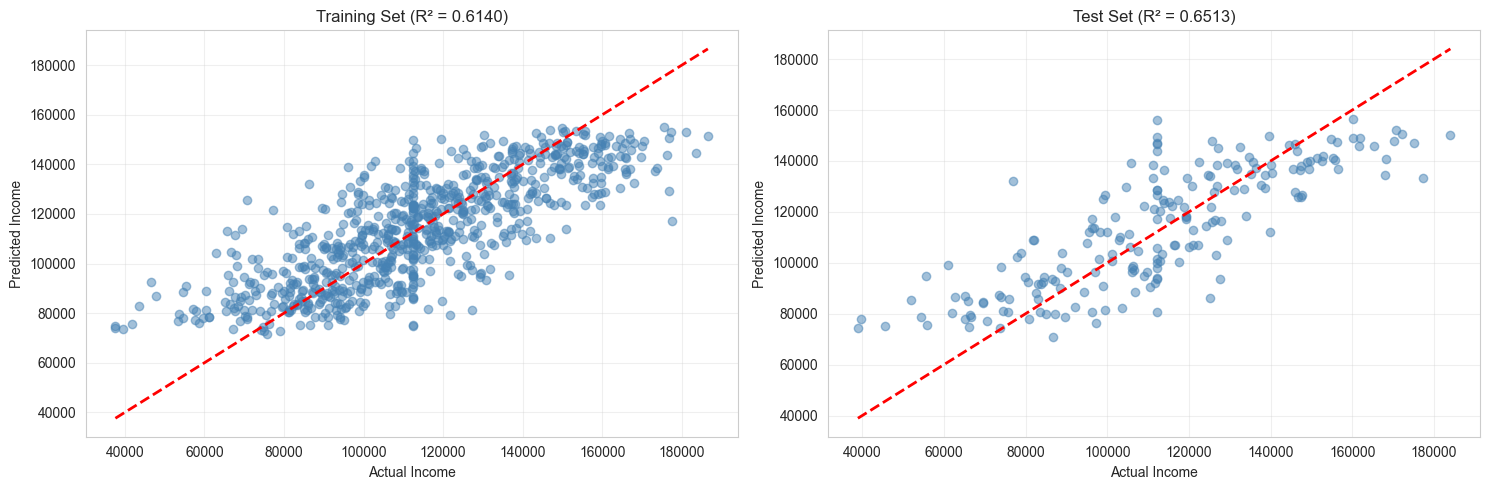

In [20]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Income')
axes[0].set_ylabel('Predicted Income')
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})')
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='steelblue')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Income')
axes[1].set_ylabel('Predicted Income')
axes[1].set_title(f'Test Set (R² = {test_r2:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Next Steps for Practice

1. **Try different datasets**: Load real datasets from Kaggle, UCI ML Repository, or APIs
2. **Feature engineering**: Create new features, transform variables, handle categorical data
3. **Advanced visualizations**: Create interactive plots with Plotly, customize matplotlib styles
4. **More ML models**: Try Random Forest, XGBoost, Neural Networks
5. **Model evaluation**: Cross-validation, hyperparameter tuning, model comparison
6. **Time series analysis**: If working with temporal data
7. **Text analysis**: Natural Language Processing tasks
8. **Deep learning**: Use TensorFlow or PyTorch for complex models

## Tips for Using Cursor with Jupyter Notebooks

- Use Cursor's AI to explain code, generate visualizations, or debug errors
- Ask for code suggestions when stuck on a specific task
- Use Cursor to refactor and optimize your code
- Generate documentation and markdown cells for your analysis
